In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle, os

In [2]:
print("\033[1;40mIPL Dataset:\033[0m")
dfIPL = pd.read_csv('./data/ipl.csv')
dfIPL["type"] = "T20"
display(dfIPL.head())
print("\033[1;40mODI Dataset:\033[0m")
dfODI = pd.read_csv('./data/odi.csv')
dfODI["type"] = "ODI"
display(dfODI.head())
print("\033[1;40mT20 Dataset:\033[0m")
dfT20 = pd.read_csv('./data/t20.csv')
dfT20["type"] = "T20"
display(dfT20.head())

IPL Dataset:


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,type
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,T20
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,T20
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,T20
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,T20
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,T20


ODI Dataset:


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,type
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301,ODI
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301,ODI
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301,ODI
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301,ODI
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301,ODI


T20 Dataset:


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,type
0,1,2005-06-13,The Rose Bowl,England,Australia,ME Trescothick,B Lee,0,0,0.1,0,0,0,0,179,T20
1,1,2005-06-13,The Rose Bowl,England,Australia,ME Trescothick,B Lee,1,0,0.2,1,0,1,0,179,T20
2,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.3,1,0,1,0,179,T20
3,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.4,1,0,1,0,179,T20
4,1,2005-06-13,The Rose Bowl,England,Australia,GO Jones,B Lee,1,0,0.5,1,0,1,0,179,T20


In [3]:
print("\033[1;40mIPL Dataset Analysis:\033[0m")
print(dfIPL.info())
display(dfIPL.describe())
print("\033[1;40mODI Dataset Analysis:\033[0m")
print(dfODI.info())
display(dfODI.describe())
print("\033[1;40mT20 Dataset Analysis:\033[0m")
print(dfT20.info())
display(dfT20.describe())

IPL Dataset Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
 15  type            76014 non-null  object 
dtypes: float64(1), int64(8), object(7)
memory usage: 9.3+ 

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


ODI Dataset Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
 15  type            350899 non-null  object 
dtypes: float64(1), int64(8), object(7)

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


T20 Dataset Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180777 entries, 0 to 180776
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             180777 non-null  int64  
 1   date            180777 non-null  object 
 2   venue           180777 non-null  object 
 3   bat_team        180777 non-null  object 
 4   bowl_team       180777 non-null  object 
 5   batsman         180777 non-null  object 
 6   bowler          180777 non-null  object 
 7   runs            180777 non-null  int64  
 8   wickets         180777 non-null  int64  
 9   overs           180777 non-null  float64
 10  runs_last_5     180777 non-null  int64  
 11  wickets_last_5  180777 non-null  int64  
 12  striker         180777 non-null  int64  
 13  non-striker     180777 non-null  int64  
 14  total           180777 non-null  int64  
 15  type            180777 non-null  object 
dtypes: float64(1), int64(8), object(7)

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000
mean,736.844726,74.553195,2.564541,9.767688,32.898798,1.193847,24.154953,8.163511,158.308225
std,425.421789,48.530296,2.101655,5.768688,14.769098,1.077084,19.559632,10.043627,30.457209
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,368.000000,34.000000,1.000000,4.600000,24.000000,0.000000,9.000000,1.000000,139.000000
50%,737.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,4.000000,159.000000
75%,1105.000000,110.000000,4.000000,14.600000,43.000000,2.000000,34.000000,12.000000,179.000000
max,1474.000000,263.000000,10.000000,19.600000,113.000000,8.000000,175.000000,109.000000,263.000000


In [4]:
total_ipl_matches = dfIPL["mid"].nunique()
total_odi_matches = dfODI["mid"].nunique()
total_t20_matches = dfT20["mid"].nunique()

output_string = f"Total number of matches played in IPL: {total_ipl_matches}\n"
output_string += f"Total number of matches played in ODI: {total_odi_matches}\n"
output_string += f"Total number of matches played in T20: {total_t20_matches}\n"
output_string += f"Total number of matches played in all formats: {total_ipl_matches + total_odi_matches + total_t20_matches}"

print(output_string)

Total number of matches played in IPL: 617
Total number of matches played in ODI: 1188
Total number of matches played in T20: 1474
Total number of matches played in all formats: 3279


In [5]:
print("\033[1;40mIPL teams:\033[0m")
for team in dfIPL["bat_team"].unique():
    print(f"\t{team} IPL matches count: {dfIPL[dfIPL['bat_team'] == team]['mid'].nunique()}")
print("\033[1;40mT20 teams:\033[0m")
for team in dfT20["bat_team"].unique():
    print(f"\t{team} T20 matches count: {dfT20[dfT20['bat_team'] == team]['mid'].nunique()}")
print("\033[1;40mODI teams:\033[0m")
for team in dfODI["bat_team"].unique():
    print(f"\t{team} ODI matches count: {dfODI[dfODI['bat_team'] == team]['mid'].nunique()}")

IPL teams:
	Kolkata Knight Riders IPL matches count: 66
	Chennai Super Kings IPL matches count: 74
	Rajasthan Royals IPL matches count: 54
	Mumbai Indians IPL matches count: 82
	Deccan Chargers IPL matches count: 43
	Kings XI Punjab IPL matches count: 75
	Royal Challengers Bangalore IPL matches count: 68
	Delhi Daredevils IPL matches count: 58
	Kochi Tuskers Kerala IPL matches count: 7
	Pune Warriors IPL matches count: 20
	Sunrisers Hyderabad IPL matches count: 42
	Rising Pune Supergiants IPL matches count: 6
	Gujarat Lions IPL matches count: 14
	Rising Pune Supergiant IPL matches count: 8
T20 teams:
	England T20 matches count: 39
	Australia T20 matches count: 44
	South Africa T20 matches count: 52
	Sri Lanka T20 matches count: 44
	West Indies T20 matches count: 42
	Kenya T20 matches count: 12
	Pakistan T20 matches count: 56
	India T20 matches count: 41
	New Zealand T20 matches count: 46
	Bangladesh T20 matches count: 24
	Kolkata Knight Riders T20 matches count: 66
	Chennai Super Kings

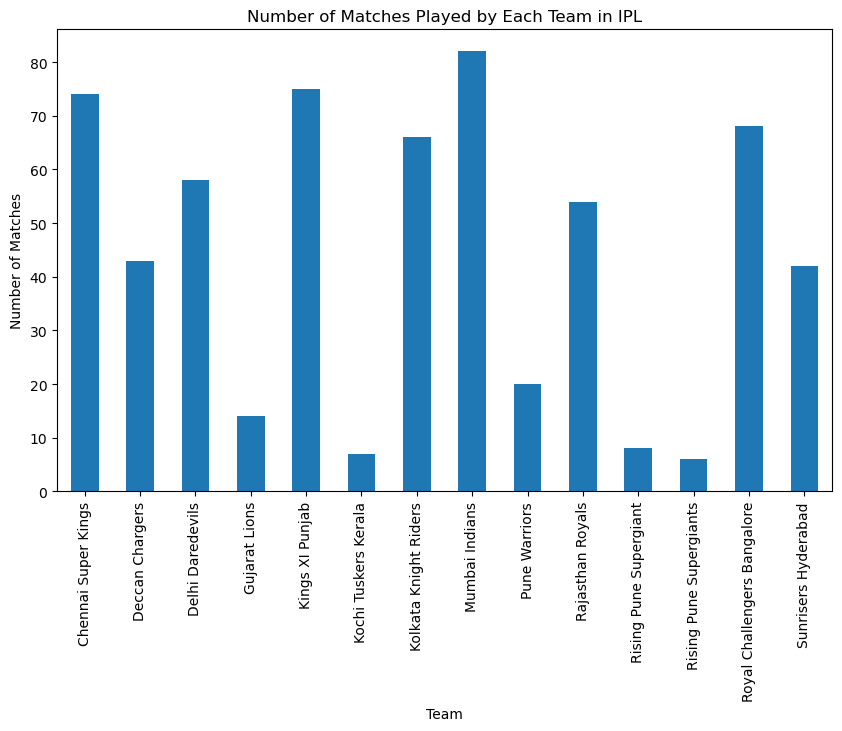

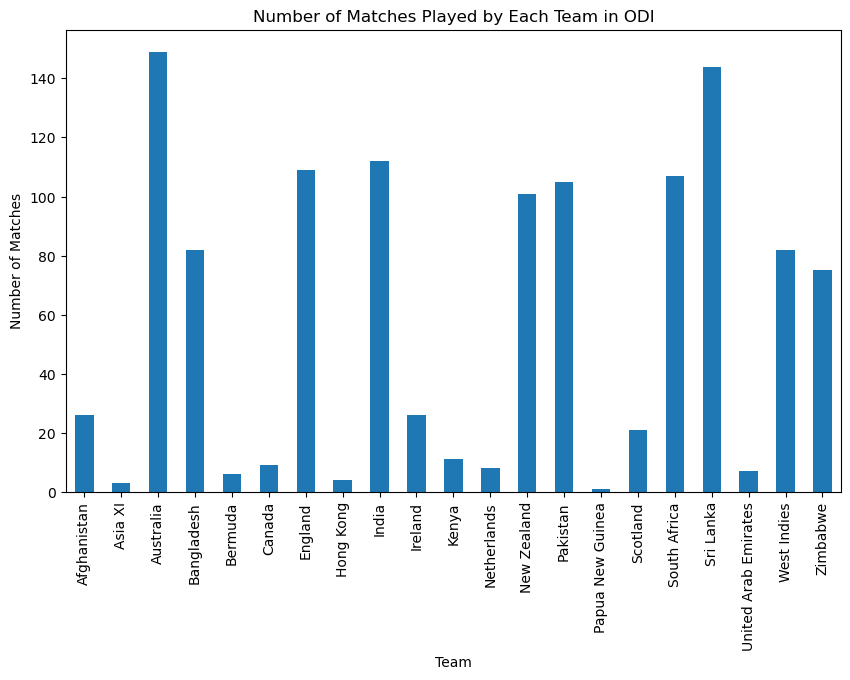

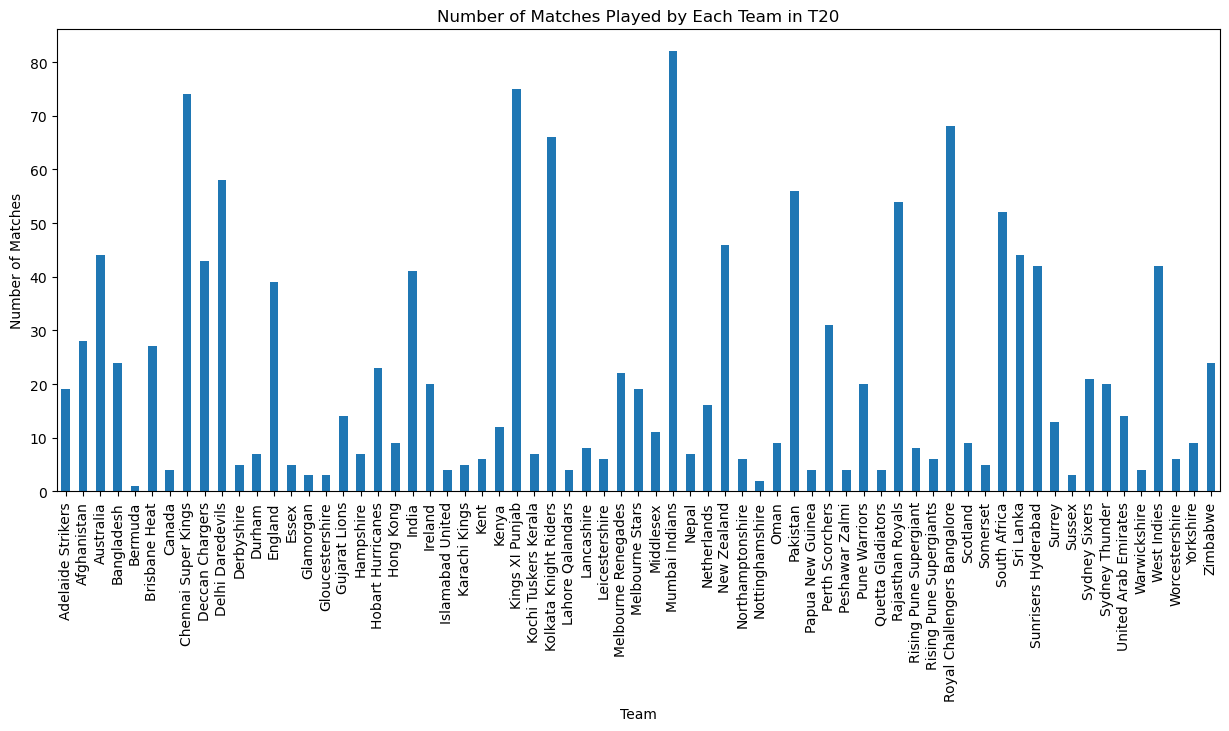

In [6]:
dfIPL.groupby("bat_team")['mid'].nunique().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Matches Played by Each Team in IPL')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

dfODI.groupby("bat_team")['mid'].nunique().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Matches Played by Each Team in ODI')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

dfT20.groupby("bat_team")['mid'].nunique().plot(kind='bar', figsize=(15, 6))
plt.title('Number of Matches Played by Each Team in T20')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

In [7]:
print("\033[1;40mIPL Team Average Score:\033[0m")
display(dfIPL.groupby("bat_team")["total"].mean())
print("\033[1;40mODI Team Average Score:\033[0m")
display(dfODI.groupby("bat_team")["total"].mean())
print("\033[1;40mT20 Team Average Score:\033[0m")
display(dfT20.groupby("bat_team")["total"].mean())

IPL Team Average Score:


bat_team
Chennai Super Kings            165.898709
Deccan Chargers                157.650758
Delhi Daredevils               155.872343
Gujarat Lions                  161.968714
Kings XI Punjab                161.190693
Kochi Tuskers Kerala           144.289954
Kolkata Knight Riders          157.332877
Mumbai Indians                 163.337903
Pune Warriors                  149.165033
Rajasthan Royals               157.565859
Rising Pune Supergiant         163.026157
Rising Pune Supergiants        170.161943
Royal Challengers Bangalore    167.243788
Sunrisers Hyderabad            162.885736
Name: total, dtype: float64

ODI Team Average Score:


bat_team
Afghanistan             231.294685
Asia XI                 328.396146
Australia               274.583853
Bangladesh              232.174770
Bermuda                 189.269796
Canada                  198.460931
England                 266.261576
Hong Kong               226.456686
India                   277.261732
Ireland                 228.572055
Kenya                   183.188172
Netherlands             202.668044
New Zealand             267.911250
Pakistan                256.961905
Papua New Guinea        201.000000
Scotland                224.372319
South Africa            282.738377
Sri Lanka               254.554023
United Arab Emirates    224.057827
West Indies             237.371397
Zimbabwe                206.446338
Name: total, dtype: float64

T20 Team Average Score:


bat_team
Adelaide Strikers    158.173950
Afghanistan          156.612819
Australia            169.584976
Bangladesh           142.691992
Bermuda               99.000000
                        ...    
Warwickshire         169.228916
West Indies          154.098099
Worcestershire       173.502695
Yorkshire            177.207993
Zimbabwe             151.124494
Name: total, Length: 67, dtype: float64

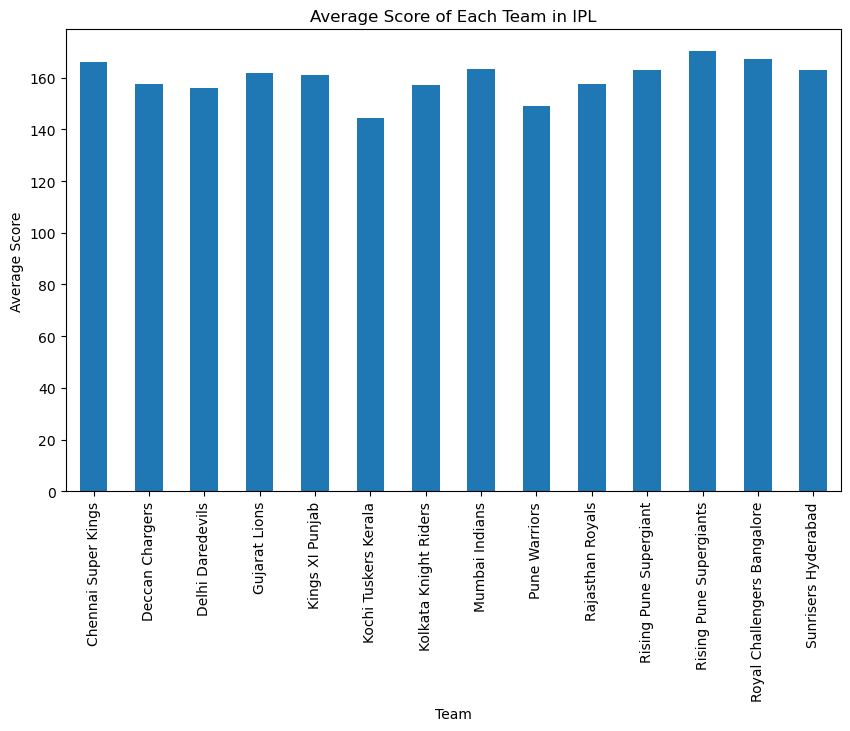

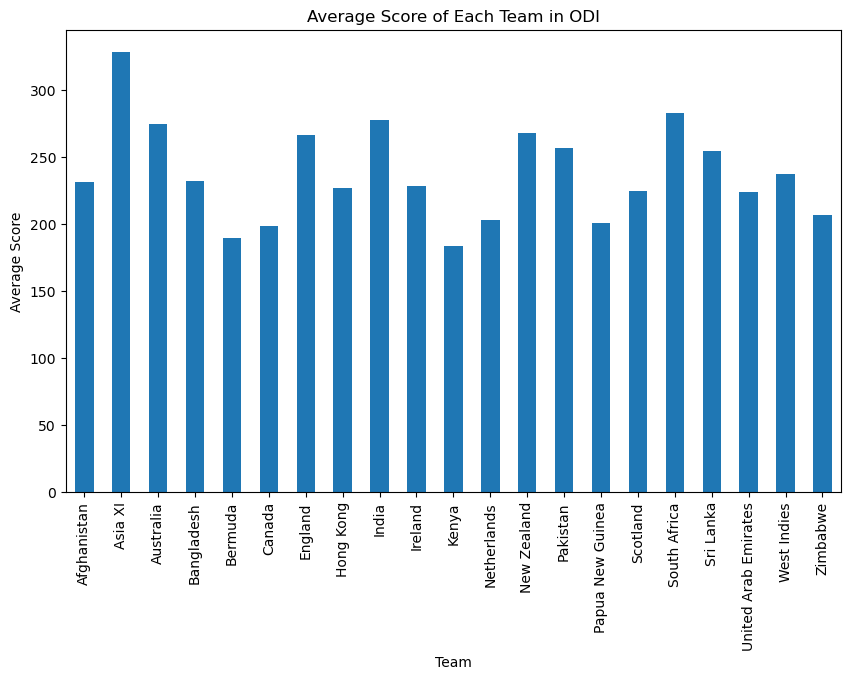

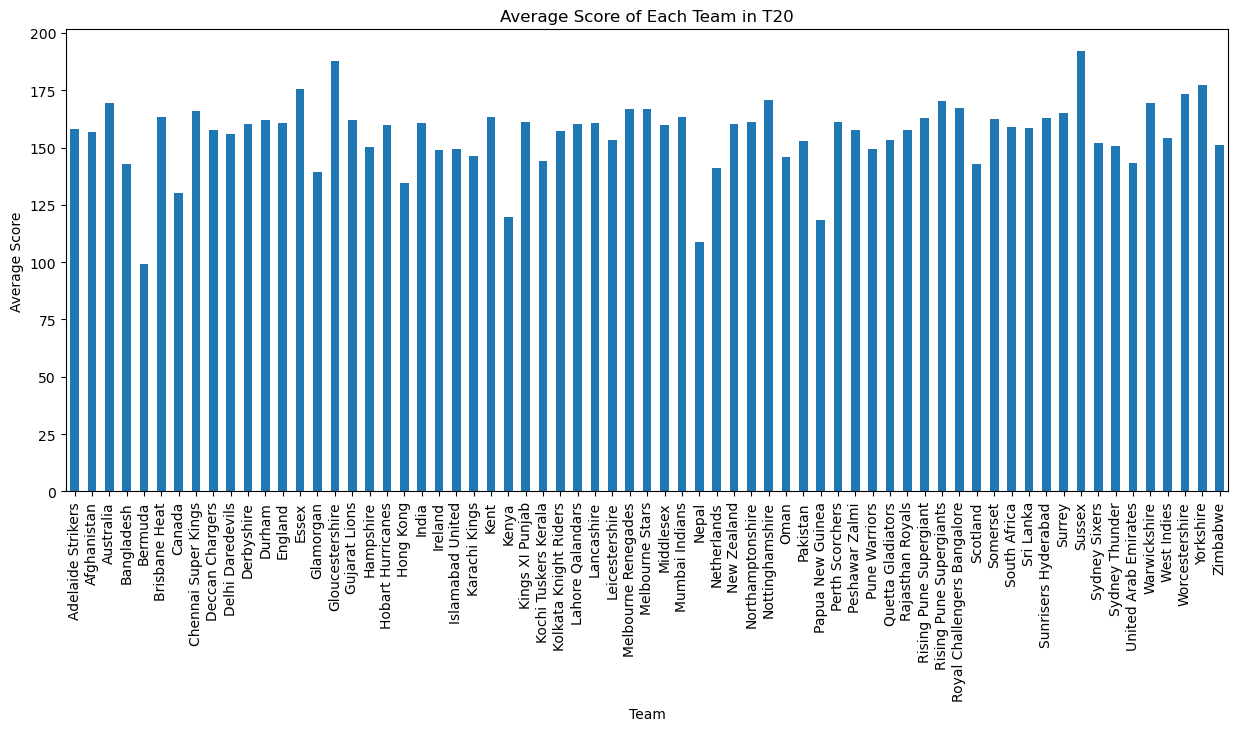

In [8]:
dfIPL.groupby("bat_team")["total"].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Score of Each Team in IPL')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.show()

dfODI.groupby("bat_team")["total"].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Score of Each Team in ODI')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.show()

dfT20.groupby("bat_team")["total"].mean().plot(kind='bar', figsize=(15, 6))
plt.title('Average Score of Each Team in T20')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.show()

## Datasets Joining

In [9]:
dfODI["mid"] = dfODI["mid"] + max(dfIPL["mid"])
dfT20["mid"] = dfT20["mid"] + max(dfODI["mid"])
df = pd.concat([dfIPL, dfODI, dfT20])
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 607690 entries, 0 to 180776
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             607690 non-null  int64  
 1   date            607690 non-null  object 
 2   venue           607690 non-null  object 
 3   bat_team        607690 non-null  object 
 4   bowl_team       607690 non-null  object 
 5   batsman         607690 non-null  object 
 6   bowler          607690 non-null  object 
 7   runs            607690 non-null  int64  
 8   wickets         607690 non-null  int64  
 9   overs           607690 non-null  float64
 10  runs_last_5     607690 non-null  int64  
 11  wickets_last_5  607690 non-null  int64  
 12  striker         607690 non-null  int64  
 13  non-striker     607690 non-null  int64  
 14  total           607690 non-null  int64  
 15  type            607690 non-null  object 
dtypes: float64(1), int64(8), object(7)
memory usage: 78.8+ MB
Non

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,607690.000000,607690.000000,607690.000000,607690.000000,607690.000000,607690.000000,607690.000000,607690.000000,607690.000000
mean,1494.235967,97.835953,2.782935,18.018335,27.539265,0.882055,30.622217,10.714210,214.670636
std,821.280688,69.822513,2.219487,13.447836,13.597845,0.973377,25.478022,13.375277,69.932059
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,873.000000,42.000000,1.000000,7.300000,18.000000,0.000000,11.000000,1.000000,159.000000
50%,1390.000000,87.000000,2.000000,14.600000,26.000000,1.000000,24.000000,6.000000,203.000000
75%,2041.000000,140.000000,4.000000,27.200000,36.000000,1.000000,43.000000,15.000000,267.000000
max,3279.000000,444.000000,10.000000,49.600000,113.000000,8.000000,264.000000,149.000000,444.000000


In [10]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
type              0
dtype: int64

In [11]:
df.nunique()

mid               3279
date              1949
venue              162
bat_team            68
bowl_team           68
batsman           1520
bowler            1148
runs               438
wickets             11
overs              350
runs_last_5        105
wickets_last_5       9
striker            234
non-striker        135
total              327
type                 2
dtype: int64

## Correlation Matrix

<Axes: >

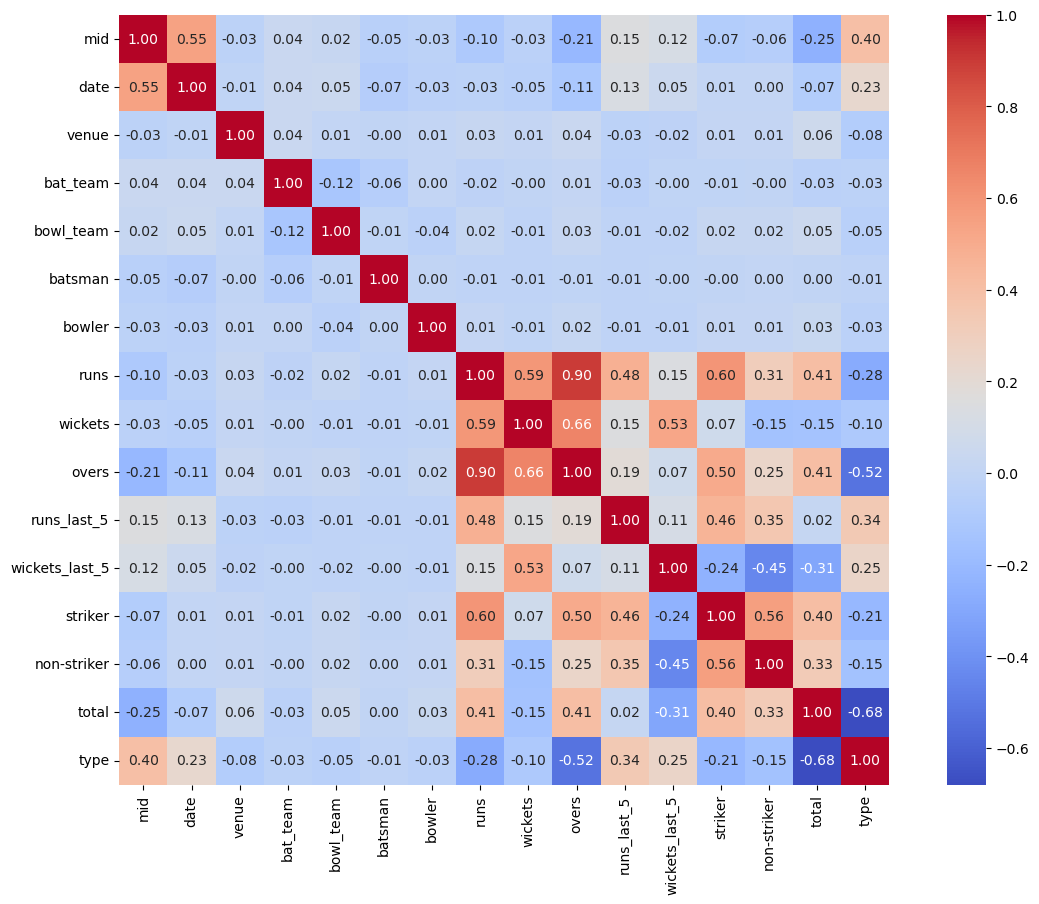

In [12]:
df_corr = df.copy()
# Identify string columns in the DataFrame
string_columns = df_corr.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode string columns
for column in string_columns:
    df_corr[column] = label_encoder.fit_transform(df_corr[column])
# Compute the correlation matrix
corr = df_corr.corr()

plt.figure(figsize=(15,10))

# Draw the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)

## Pre-Processing

In [13]:
label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
X = df.drop(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler','total'], axis=1)
Y = df['total']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=23)
print(X_train.shape, X_test.shape, sep="\n\n")

(425383, 8)

(182307, 8)


### Scaling
The StandardScaler in scikit-learn is used to standardize features by subtracting the mean and scaling to unit variance.

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training
### Linear Regression

In [16]:
# LR = LinearRegression()
# LR.fit(X_train, Y_train)

In [17]:
if not os.path.exists('./models/LRmodel.pkl'):
    with open('./models/LRmodel.pkl', 'wb') as file:
        pickle.dump(LR, file)
else:
    with open('./models/LRmodel.pkl', 'rb') as file:
        LR = pickle.load(file)

In [18]:
print("Training Score: ", LR.score(X_train, Y_train))
print("Testing Score: ", LR.score(X_test, Y_test))
print(mean_squared_error(Y_test, LR.predict(X_test)))

Training Score:  0.7296560701681811
Testing Score:  0.7332304335939026
1306.0699718532676


### Decision Tree Regression

In [19]:
# DT = DecisionTreeRegressor()
# DT.fit(X_train, Y_train)

In [20]:
if not os.path.exists('./models/DTmodel.pkl'):
    with open('./models/DTmodel.pkl', 'wb') as file:
        pickle.dump(DT, file)
else:
    with open('./models/DTmodel.pkl', 'rb') as file:
        DT = pickle.load(file)

In [21]:
print("Training Score: ", DT.score(X_train, Y_train))
print("Testing Score: ", DT.score(X_test, Y_test))
print(mean_squared_error(Y_test, DT.predict(X_test)))

Training Score:  0.9693463815861526
Testing Score:  0.8191580713829144
885.3791525051904


###  Random Forest Regression

In [22]:
# RF = RandomForestRegressor()
# RF.fit(X_train, Y_train)

In [23]:
if not os.path.exists('./models/RFmodel.pkl'):
    with open('./models/RFmodel.pkl', 'wb') as file:
        pickle.dump(RF, file)
else:
    with open('./models/RFmodel.pkl', 'rb') as file:
        RF = pickle.load(file)

In [24]:
print("Training Score: ", RF.score(X_train, Y_train))
print("Testing Score: ", RF.score(X_test, Y_test))
print(mean_squared_error(Y_test, RF.predict(X_test)))

Training Score:  0.9598697201151787
Testing Score:  0.8897691317240672
539.6763542635427


### MultiLayer Percepton / Artificial Neural Network (ANN)

In [25]:
# MLP = MLPRegressor(hidden_layer_sizes=(32,16,4,2), max_iter=1000, activation='relu', solver='adam', random_state=23)
# MLP.fit(X_train, Y_train)

In [26]:
if not os.path.exists('./models/MLPmodel.pkl'):
    with open('./models/MLPmodel.pkl', 'wb') as file:
        pickle.dump(MLP, file)
else:
    with open('./models/MLPmodel.pkl', 'rb') as file:
        MLP = pickle.load(file)

In [27]:
print("Training Score: ", MLP.score(X_train, Y_train))
print("Testing Score: ", MLP.score(X_test, Y_test))
print(mean_squared_error(Y_test, MLP.predict(X_test)))

Training Score:  0.7639745275707857
Testing Score:  0.7673562692200235
1138.9942076417385


### Support Vector Regression

In [28]:
# SVR = SVR()
# SVR.fit(X_train, Y_train)

In [29]:
if not os.path.exists('./models/SVRmodel.pkl'):
    with open('./models/SVRmodel.pkl', 'wb') as file:
        pickle.dump(SVR, file)
else:
    with open('./models/SVRmodel.pkl', 'rb') as file:
        SVR = pickle.load(file)

In [30]:
print("Training Score: ", SVR.score(X_train, Y_train))
print("Testing Score: ", SVR.score(X_test, Y_test))
print(mean_squared_error(Y_test, SVR.predict(X_test)))

Training Score:  0.7613459016278047
Testing Score:  0.7648156552434261
1151.4327315318787
